<a href="https://colab.research.google.com/github/paulcho98/AIFFEL_Datathon/blob/master/Datathon_Netflix_%EC%A1%B0%ED%98%84%EB%B9%88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 라이브러리 불러오기

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MultiLabelBinarizer

# 데이터 준비

In [ ]:
#data = pd.read_csv('netflix_titles.csv')
data = pd.read_csv('/content/drive/MyDrive/netflix_titles.csv')
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
data['date_added'].isna().sum()

10

In [ ]:
data['release_year'].value_counts().sort_index()

1925       1
1942       2
1943       3
1944       3
1945       4
        ... 
2017    1032
2018    1147
2019    1030
2020     953
2021     592
Name: release_year, Length: 74, dtype: int64

## date_added 시각화

In [ ]:
netflix_date = data[['date_added']].dropna()
netflix_date['year'] = netflix_date['date_added'].apply(lambda x : x.split(', ')[-1])
netflix_date['month'] = netflix_date['date_added'].apply(lambda x : x.lstrip().split(' ')[0])
data['year_added'] = netflix_date['date_added'].apply(lambda x : x.split(', ')[-1]).astype('int')
data['month_added'] = netflix_date['date_added'].apply(lambda x : x.lstrip().split(' ')[0])
netflix_date.head()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,date_added,year,month
0,"September 25, 2021",2021,September
1,"September 24, 2021",2021,September
2,"September 24, 2021",2021,September
3,"September 24, 2021",2021,September
4,"September 24, 2021",2021,September


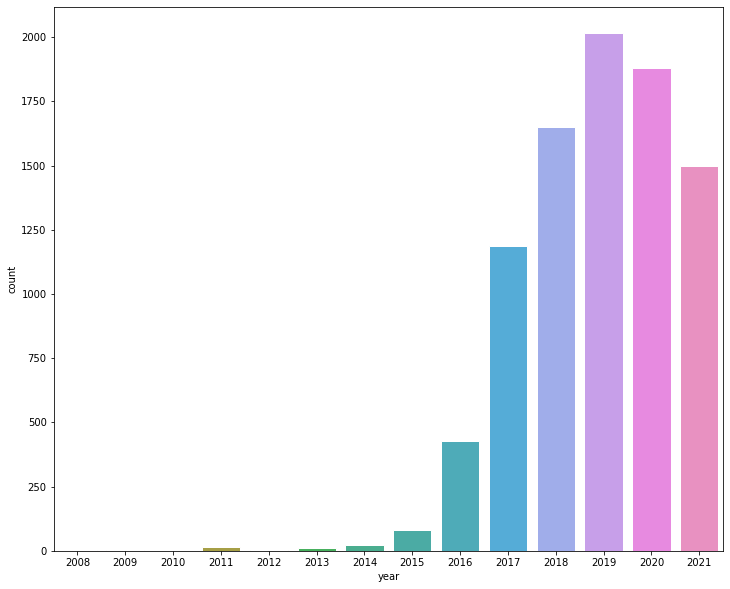

In [ ]:
countplt, ax = plt.subplots(figsize=(12,10))
sns.set_theme(style="darkgrid")
year_order = map(str, range(2008,2022))
ax = sns.countplot(x='year', data=netflix_date, order=year_order)

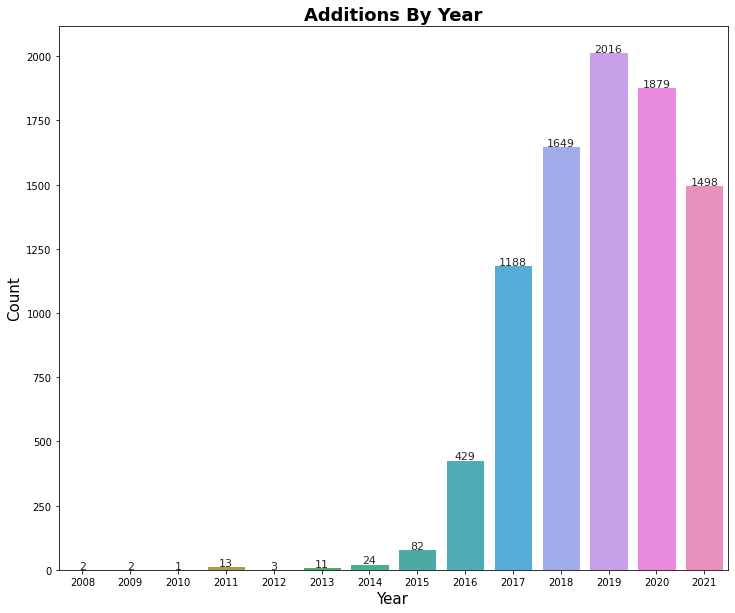

In [ ]:
ax.set_title('Additions By Year',fontsize = 18, fontweight='bold' )
ax.set_xlabel('Year', fontsize = 15)
ax.set_ylabel('Count', fontsize = 15)
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.75,rect.get_height(),horizontalalignment='center', fontsize = 11)
countplt

In [ ]:
netflix_date['month'].value_counts()

July         827
December     813
September    770
April        764
October      760
August       755
March        742
January      738
June         728
November     705
May          632
February     563
Name: month, dtype: int64

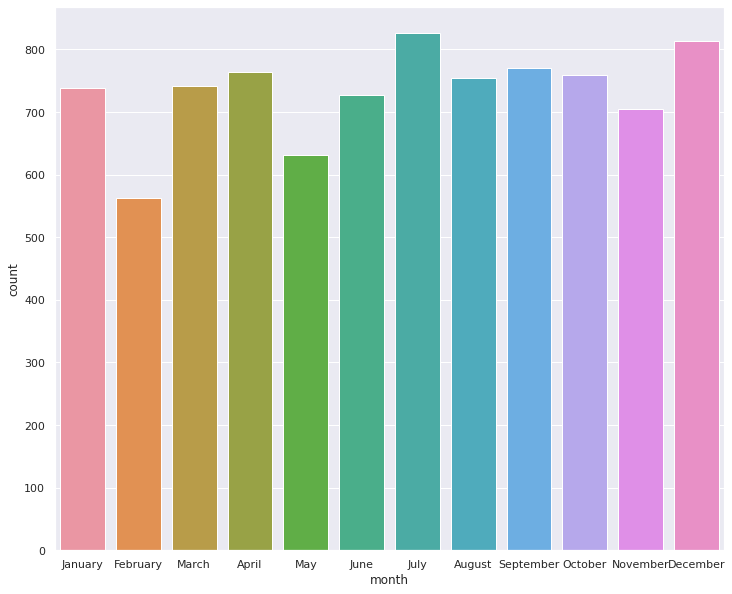

In [ ]:
countplt, ax = plt.subplots(figsize=(12,10))
sns.set_theme(style="darkgrid")
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
ax = sns.countplot(x='month', data=netflix_date, order=month_order)

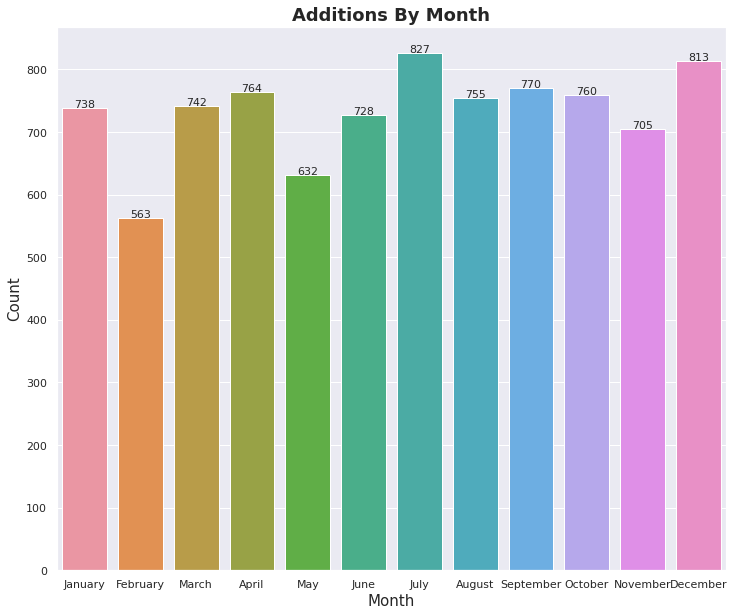

In [ ]:
ax.set_title('Additions By Month',fontsize = 18, fontweight='bold' )
ax.set_xlabel('Month', fontsize = 15)
ax.set_ylabel('Count', fontsize = 15)
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.75,rect.get_height(),horizontalalignment='center', fontsize = 11)
countplt

# release_year 시각화

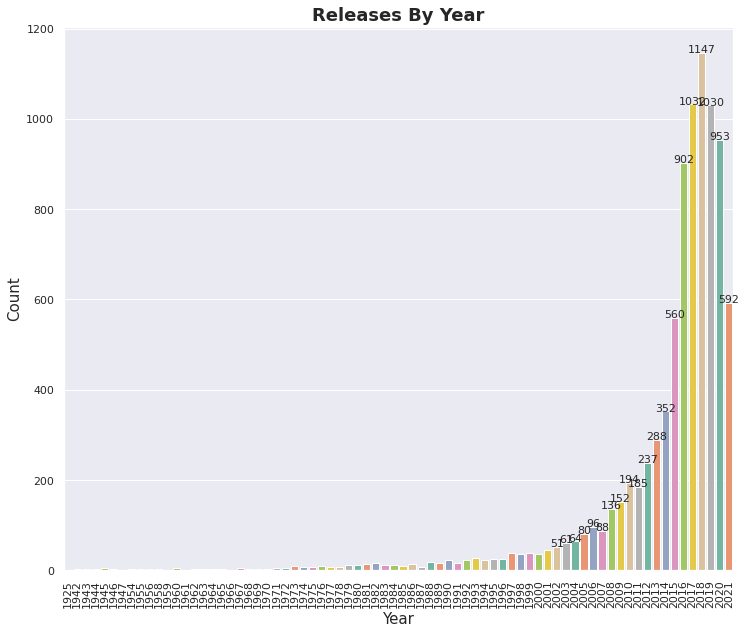

In [ ]:
countplt, ax = plt.subplots(figsize=(12,10))
sns.set_theme(style="darkgrid")
#month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
ax = sns.countplot(x='release_year', data=data, palette='Set2')
plt.xticks(rotation='vertical')
ax.set_title('Releases By Year',fontsize = 18, fontweight='bold' )
ax.set_xlabel('Year', fontsize = 15)
ax.set_ylabel('Count', fontsize = 15)
for rect in ax.patches[-20:]:
    ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.75,rect.get_height(),horizontalalignment='center', fontsize = 11)


### country 복수 개 확인

In [ ]:
countries=data[['country']].dropna()
countries['country']=countries['country'].apply(lambda x: x.split(", "))
countries['num'] = countries['country'].apply(lambda x: len(x))
countries

,country,num
0,[United States],1
1,[South Africa],1
4,[India],1
7,"[United States, Ghana, Burkina Faso, United Ki...",6
8,[United Kingdom],1
...,...,...
8801,"[United Arab Emirates, Jordan]",2
8802,[United States],1
8804,[United States],1
8805,[United States],1


In [ ]:
countries['num'].value_counts()

1     6660
2      869
3      273
4      115
5       36
6       14
7        5
8        2
12       1
10       1
Name: num, dtype: int64

# Genre One-Hot Encoding

In [ ]:
# 장르 고유값 리스트로
original_genres = [x.split(', ') for x in data['listed_in']]
genres = np.unique(sum(original_genres, []))
genres

array(['Action & Adventure', 'Anime Features', 'Anime Series',
       'British TV Shows', 'Children & Family Movies',
       'Classic & Cult TV', 'Classic Movies', 'Comedies',
       'Crime TV Shows', 'Cult Movies', 'Documentaries', 'Docuseries',
       'Dramas', 'Faith & Spirituality', 'Horror Movies',
       'Independent Movies', 'International Movies',
       'International TV Shows', "Kids' TV", 'Korean TV Shows',
       'LGBTQ Movies', 'Movies', 'Music & Musicals', 'Reality TV',
       'Romantic Movies', 'Romantic TV Shows', 'Sci-Fi & Fantasy',
       'Science & Nature TV', 'Spanish-Language TV Shows',
       'Sports Movies', 'Stand-Up Comedy', 'Stand-Up Comedy & Talk Shows',
       'TV Action & Adventure', 'TV Comedies', 'TV Dramas', 'TV Horror',
       'TV Mysteries', 'TV Sci-Fi & Fantasy', 'TV Shows', 'TV Thrillers',
       'Teen TV Shows', 'Thrillers'], dtype='<U28')

In [ ]:
# 장르 개수
len(genres)

42

In [ ]:
# listed_in 장르로 one-hot encoding
data['listed_in'] = [x.split(', ') for x in data['listed_in']]
genre_data = MultiLabelBinarizer(classes=genres).fit_transform(data['listed_in'].values)
df = pd.DataFrame(columns=genres, data=genre_data, index=data.index)
df.head()

,Action & Adventure,Anime Features,Anime Series,British TV Shows,Children & Family Movies,Classic & Cult TV,Classic Movies,Comedies,Crime TV Shows,Cult Movies,...,TV Action & Adventure,TV Comedies,TV Dramas,TV Horror,TV Mysteries,TV Sci-Fi & Fantasy,TV Shows,TV Thrillers,Teen TV Shows,Thrillers
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [ ]:
# data에 one-hot encoding 추가
data = pd.concat([data, df], axis=1)
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,TV Action & Adventure,TV Comedies,TV Dramas,TV Horror,TV Mysteries,TV Sci-Fi & Fantasy,TV Shows,TV Thrillers,Teen TV Shows,Thrillers
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,...,0,0,0,0,0,0,0,0,0,0
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,...,0,0,1,0,1,0,0,0,0,0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,...,1,0,0,0,0,0,0,0,0,0
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,...,0,0,0,0,0,0,0,0,0,0
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,...,0,1,0,0,0,0,0,0,0,0


In [ ]:
# 영화 데이터와 드라마 데이터를 movie와 tv에 할당
movie = data[data['type']=='Movie']
tv = data[data['type']=='TV Show']
movie.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,TV Action & Adventure,TV Comedies,TV Dramas,TV Horror,TV Mysteries,TV Sci-Fi & Fantasy,TV Shows,TV Thrillers,Teen TV Shows,Thrillers
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,...,0,0,0,0,0,0,0,0,0,0
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,...,0,0,0,0,0,0,0,0,0,0
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,...,0,0,0,0,0,0,0,0,0,0
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,...,0,0,0,0,0,0,0,0,0,0
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
tv.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,TV Action & Adventure,TV Comedies,TV Dramas,TV Horror,TV Mysteries,TV Sci-Fi & Fantasy,TV Shows,TV Thrillers,Teen TV Shows,Thrillers
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,...,0,0,1,0,1,0,0,0,0,0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,...,1,0,0,0,0,0,0,0,0,0
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,...,0,0,0,0,0,0,0,0,0,0
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,...,0,1,0,0,0,0,0,0,0,0
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,...,0,0,1,1,1,0,0,0,0,0


In [ ]:
# 영화에 사용되는 장르 분포
movie_labels = movie.iloc[:,14:].sum()
movie_labels = movie_labels[movie_labels>0]
print(len(movie_labels))
movie_labels

20


Action & Adventure           859
Anime Features                71
Children & Family Movies     641
Classic Movies               116
Comedies                    1674
Cult Movies                   71
Documentaries                869
Dramas                      2427
Faith & Spirituality          65
Horror Movies                357
Independent Movies           756
International Movies        2752
LGBTQ Movies                 102
Movies                        57
Music & Musicals             375
Romantic Movies              616
Sci-Fi & Fantasy             243
Sports Movies                219
Stand-Up Comedy              343
Thrillers                    577
dtype: int64

In [ ]:
# 드라마에 사용되는 장르 분포
tv_labels = tv.iloc[:,14:].sum()
tv_labels = tv_labels[tv_labels>0]
print(len(tv_labels))
tv_labels

22


Anime Series                     176
British TV Shows                 253
Classic & Cult TV                 28
Crime TV Shows                   470
Docuseries                       395
International TV Shows          1351
Kids' TV                         451
Korean TV Shows                  151
Reality TV                       255
Romantic TV Shows                370
Science & Nature TV               92
Spanish-Language TV Shows        174
Stand-Up Comedy & Talk Shows      56
TV Action & Adventure            168
TV Comedies                      581
TV Dramas                        763
TV Horror                         75
TV Mysteries                      98
TV Sci-Fi & Fantasy               84
TV Shows                          16
TV Thrillers                      57
Teen TV Shows                     69
dtype: int64

In [ ]:
movie_genres=list(movie_labels.index)
movie_genres

['Action & Adventure',
 'Anime Features',
 'Children & Family Movies',
 'Classic Movies',
 'Comedies',
 'Cult Movies',
 'Documentaries',
 'Dramas',
 'Faith & Spirituality',
 'Horror Movies',
 'Independent Movies',
 'International Movies',
 'LGBTQ Movies',
 'Movies',
 'Music & Musicals',
 'Romantic Movies',
 'Sci-Fi & Fantasy',
 'Sports Movies',
 'Stand-Up Comedy',
 'Thrillers']

In [ ]:
tv_genres=list(tv_labels.index)
tv_genres

['Anime Series',
 'British TV Shows',
 'Classic & Cult TV',
 'Crime TV Shows',
 'Docuseries',
 'International TV Shows',
 "Kids' TV",
 'Korean TV Shows',
 'Reality TV',
 'Romantic TV Shows',
 'Science & Nature TV',
 'Spanish-Language TV Shows',
 'Stand-Up Comedy & Talk Shows',
 'TV Action & Adventure',
 'TV Comedies',
 'TV Dramas',
 'TV Horror',
 'TV Mysteries',
 'TV Sci-Fi & Fantasy',
 'TV Shows',
 'TV Thrillers',
 'Teen TV Shows']

In [ ]:
# 영화 데이터 one-hot encoding
movie = data[data['type']=='Movie']
movie_genre_data = MultiLabelBinarizer(classes=movie_genres).fit_transform(movie['listed_in'].values)
df = pd.DataFrame(columns=movie_genres, data=movie_genre_data, index=movie.index)
df.head()

,Action & Adventure,Anime Features,Children & Family Movies,Classic Movies,Comedies,Cult Movies,Documentaries,Dramas,Faith & Spirituality,Horror Movies,Independent Movies,International Movies,LGBTQ Movies,Movies,Music & Musicals,Romantic Movies,Sci-Fi & Fantasy,Sports Movies,Stand-Up Comedy,Thrillers
0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0
9,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
12,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0


In [ ]:
# 영화 데이터에 one-hot encoding 추가
movie = pd.concat([movie, df], axis=1)
movie.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,Independent Movies,International Movies,LGBTQ Movies,Movies,Music & Musicals,Romantic Movies,Sci-Fi & Fantasy,Sports Movies,Stand-Up Comedy,Thrillers
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,...,0,0,0,0,0,0,0,0,0,0
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,...,0,0,0,0,0,0,0,0,0,0
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,...,1,1,0,0,0,0,0,0,0,0
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,...,0,0,0,0,0,0,0,0,0,0
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,...,0,1,0,0,0,0,0,0,0,0


In [ ]:
# 드라마 데이터 one-hot encoding
tv = data[data['type']=='TV Show']
tv_genre_data = MultiLabelBinarizer(classes=tv_genres).fit_transform(tv['listed_in'].values)
df = pd.DataFrame(columns=tv_genres, data=tv_genre_data, index=tv.index)
df.head()

,Anime Series,British TV Shows,Classic & Cult TV,Crime TV Shows,Docuseries,International TV Shows,Kids' TV,Korean TV Shows,Reality TV,Romantic TV Shows,...,Stand-Up Comedy & Talk Shows,TV Action & Adventure,TV Comedies,TV Dramas,TV Horror,TV Mysteries,TV Sci-Fi & Fantasy,TV Shows,TV Thrillers,Teen TV Shows
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
2,0,0,0,1,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,1,0,0,0,0


In [ ]:
# 영화 데이터에 one-hot encoding 추가
tv = pd.concat([tv, df], axis=1)
tv.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,Stand-Up Comedy & Talk Shows,TV Action & Adventure,TV Comedies,TV Dramas,TV Horror,TV Mysteries,TV Sci-Fi & Fantasy,TV Shows,TV Thrillers,Teen TV Shows
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,...,0,0,0,1,0,1,0,0,0,0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,...,0,1,0,0,0,0,0,0,0,0
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,...,0,0,0,0,0,0,0,0,0,0
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,...,0,0,1,0,0,0,0,0,0,0
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,...,0,0,0,1,1,1,0,0,0,0


In [ ]:
total_count = data['year_added'].dropna().astype('uint64').value_counts().sort_index()

total_count

2008       2
2009       2
2010       1
2011      13
2012       3
2013      11
2014      24
2015      82
2016     429
2017    1188
2018    1649
2019    2016
2020    1879
2021    1498
Name: year_added, dtype: int64

In [ ]:
total_count.sum()

8797

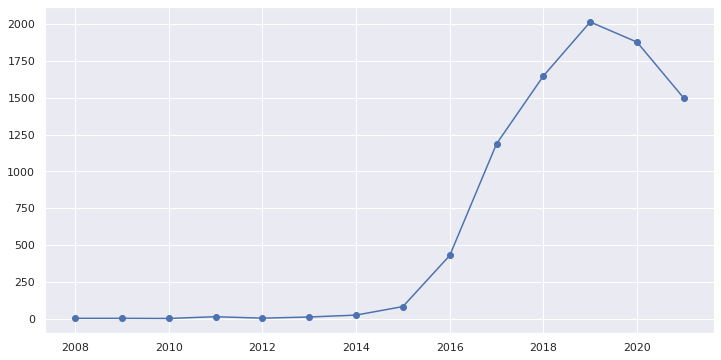

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
ax.plot(total_count, 'o-')

In [ ]:
t_date_data = tv.dropna(subset=['date_added'])
len(t_date_data)

2666

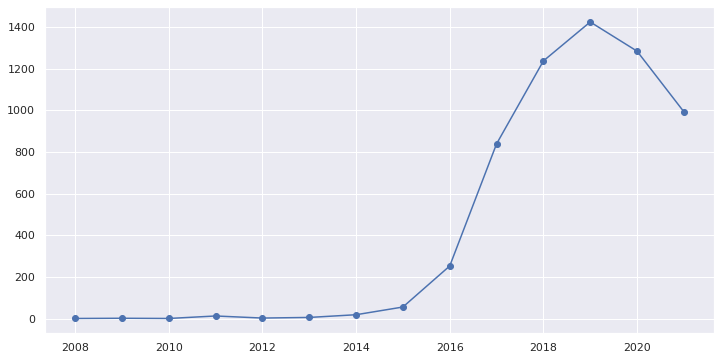

In [ ]:
movie_count = movie['year_added'].astype('uint64').value_counts().sort_index()
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
ax.plot(movie_count, 'o-')

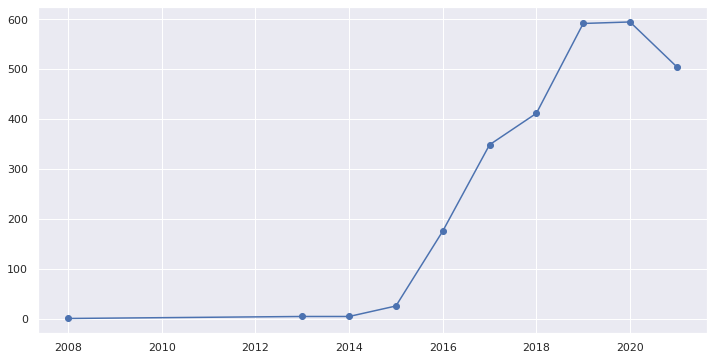

In [ ]:
tv_count = tv['year_added'].dropna().astype('uint64').value_counts().sort_index()
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
ax.plot(tv_count, 'o-')

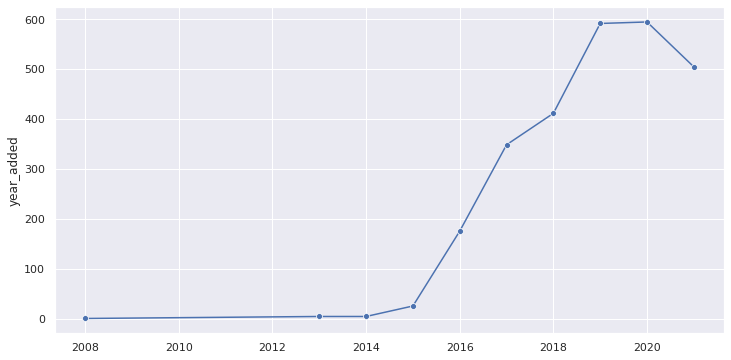

In [ ]:
tv_count = tv['year_added'].dropna().astype('uint64').value_counts().sort_index()
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
sns.lineplot(x=tv_count.index, y=tv_count, marker='o')

* bhartiprasad17 확인
* country 데이터 전처리 필요

In [ ]:
countries=data.dropna(subset=['country']).copy()
countries['first_country']=countries['country'].apply(lambda x: x.split(", ")[0])
countries

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,TV Comedies,TV Dramas,TV Horror,TV Mysteries,TV Sci-Fi & Fantasy,TV Shows,TV Thrillers,Teen TV Shows,Thrillers,first_country
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,...,0,0,0,0,0,0,0,0,0,United States
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,...,0,1,0,1,0,0,0,0,0,South Africa
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,...,1,0,0,0,0,0,0,0,0,India
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,...,0,0,0,0,0,0,0,0,0,United States
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,...,0,0,0,0,0,0,0,0,0,United Kingdom
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,...,0,0,0,0,0,0,0,0,1,United Arab Emirates
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,...,0,0,0,0,0,0,0,0,1,United States
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,...,0,0,0,0,0,0,0,0,0,United States
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,...,0,0,0,0,0,0,0,0,0,United States


In [ ]:
country_count = countries['first_country'].value_counts()
country_count[:10]

United States     3210
India             1008
United Kingdom     626
Canada             271
Japan              259
France             212
South Korea        211
Spain              181
Mexico             134
Australia          117
Name: first_country, dtype: int64

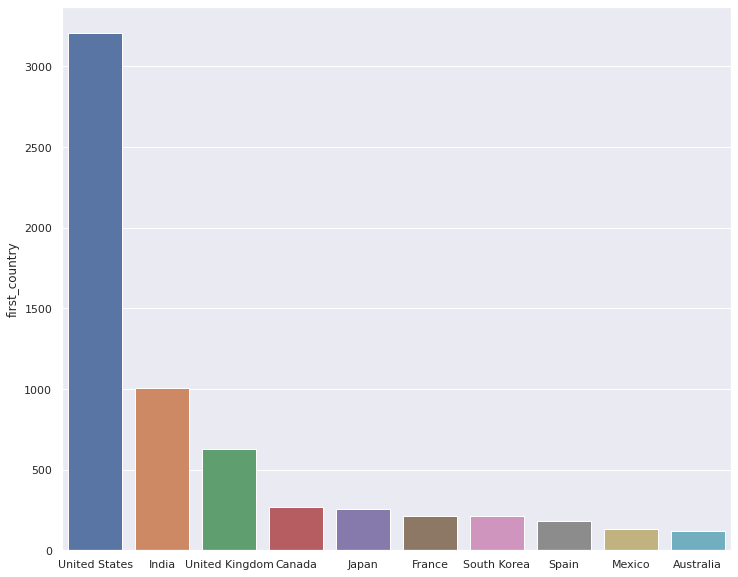

In [ ]:
barplt, ax = plt.subplots(figsize=(12,10))
sns.set_theme(style="darkgrid")
ax = sns.barplot(x=country_count[:10].index, y=country_count[:10])

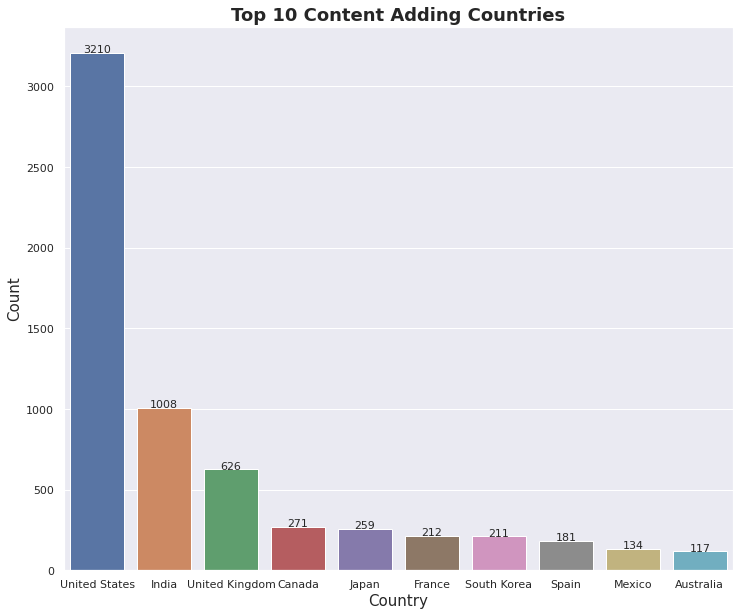

In [ ]:
ax.set_title('Top 10 Content Adding Countries',fontsize = 18, fontweight='bold' )
ax.set_xlabel('Country', fontsize = 15)
ax.set_ylabel('Count', fontsize = 15)
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.75,int(rect.get_height()),horizontalalignment='center', fontsize = 11)
barplt

In [ ]:
# 영화와 드라마 데이터에서 'country' 결측치 처리
movie_country = movie.dropna(subset=['country']).copy()
movie_country['first_country']=movie_country['country'].apply(lambda x: x.split(", ")[0])
movie_country.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,International Movies,LGBTQ Movies,Movies,Music & Musicals,Romantic Movies,Sci-Fi & Fantasy,Sports Movies,Stand-Up Comedy,Thrillers,first_country
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,...,0,0,0,0,0,0,0,0,0,United States
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,...,1,0,0,0,0,0,0,0,0,United States
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,...,0,0,0,0,0,0,0,0,0,United States
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,...,1,0,0,0,0,0,0,0,0,Germany
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,TV-14,166 min,...,1,0,0,0,1,0,0,0,0,India


In [ ]:
tv_country = tv.dropna(subset=['country']).copy()
tv_country['first_country']=tv_country['country'].apply(lambda x: x.split(", ")[0])
tv_country.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,TV Action & Adventure,TV Comedies,TV Dramas,TV Horror,TV Mysteries,TV Sci-Fi & Fantasy,TV Shows,TV Thrillers,Teen TV Shows,first_country
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,...,0,0,1,0,1,0,0,0,0,South Africa
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,...,0,1,0,0,0,0,0,0,0,India
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,...,0,0,0,0,0,0,0,0,0,United Kingdom
15,s16,TV Show,Dear White People,NaN,"Logan Browning, Brandon P. Bell, DeRon Horton,...",United States,"September 22, 2021",2021,TV-MA,4 Seasons,...,0,1,1,0,0,0,0,0,0,United States
17,s18,TV Show,Falsa identidad,NaN,"Luis Ernesto Franco, Camila Sodi, Sergio Goyri...",Mexico,"September 22, 2021",2020,TV-MA,2 Seasons,...,0,0,1,0,0,0,0,0,0,Mexico


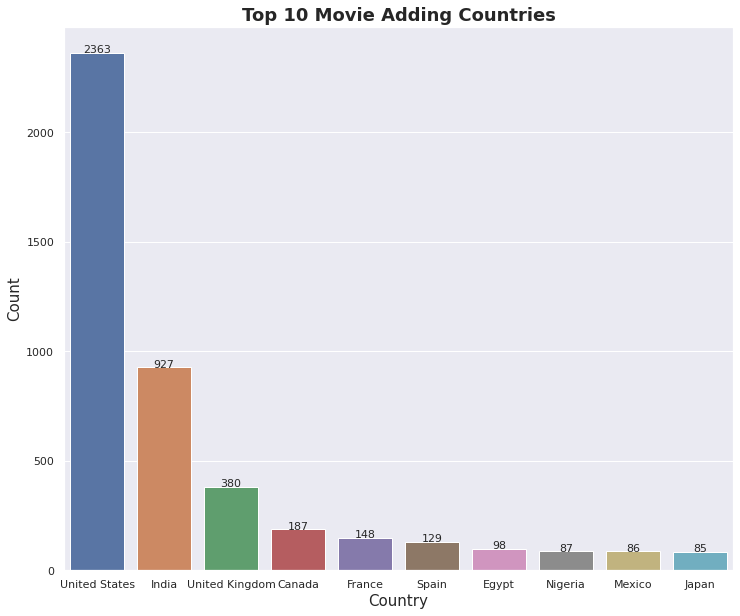

In [ ]:
movie_country_count = movie_country['first_country'].value_counts()
barplt, ax = plt.subplots(figsize=(12,10))
sns.set_theme(style="darkgrid")
ax = sns.barplot(x=movie_country_count[:10].index, y=movie_country_count[:10])
ax.set_title('Top 10 Movie Adding Countries',fontsize = 18, fontweight='bold' )
ax.set_xlabel('Country', fontsize = 15)
ax.set_ylabel('Count', fontsize = 15)
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.75,int(rect.get_height()),horizontalalignment='center', fontsize = 11)

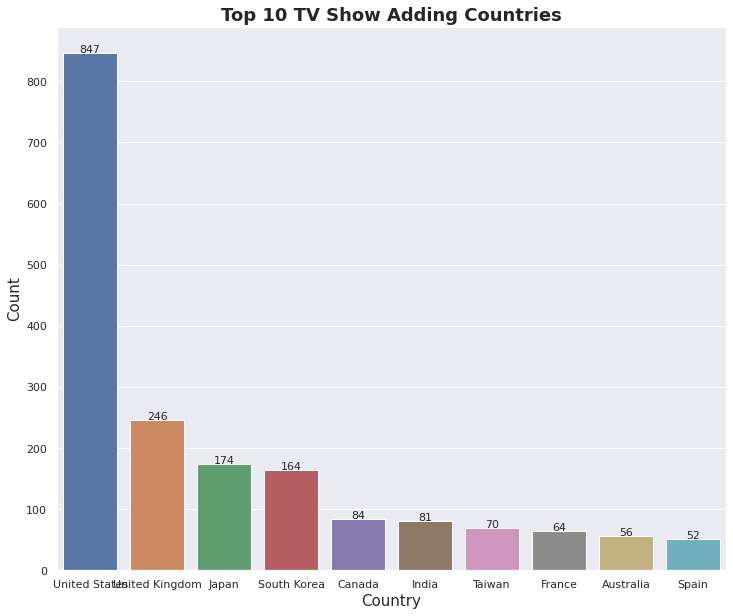

In [ ]:
tv_country_count = tv_country['first_country'].value_counts()
barplt, ax = plt.subplots(figsize=(12,10))
sns.set_theme(style="darkgrid")
ax = sns.barplot(x=tv_country_count[:10].index, y=tv_country_count[:10])
ax.set_title('Top 10 TV Show Adding Countries',fontsize = 18, fontweight='bold' )
ax.set_xlabel('Country', fontsize = 15)
ax.set_ylabel('Count', fontsize = 15)
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.75,int(rect.get_height()),horizontalalignment='center', fontsize = 11)

## 연도별 전체 컨텐츠

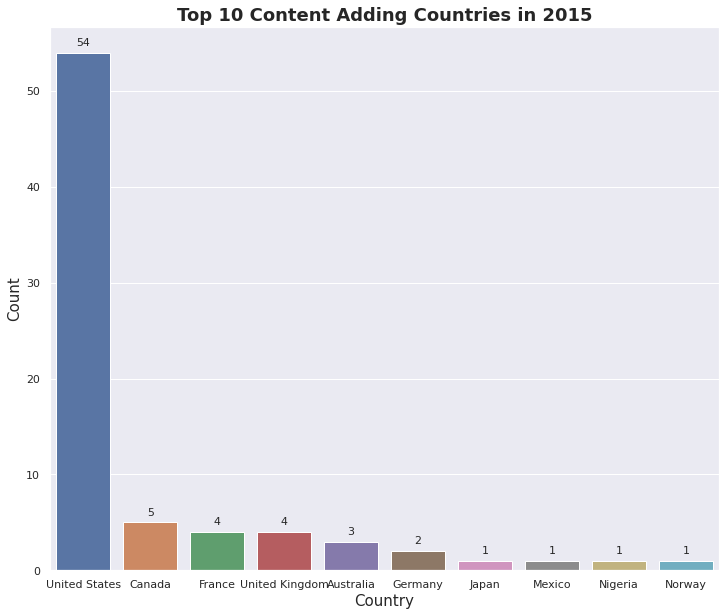

In [ ]:
total_2015 = countries[countries['year_added']==2015]['first_country'].value_counts()
barplt, ax = plt.subplots(figsize=(12,10))
sns.set_theme(style="darkgrid")
ax = sns.barplot(x=total_2015[:10].index, y=total_2015[:10])
ax.set_title('Top 10 Content Adding Countries in 2015',fontsize = 18, fontweight='bold' )
ax.set_xlabel('Country', fontsize = 15)
ax.set_ylabel('Count', fontsize = 15)
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.75,int(rect.get_height()),horizontalalignment='center', fontsize = 11)

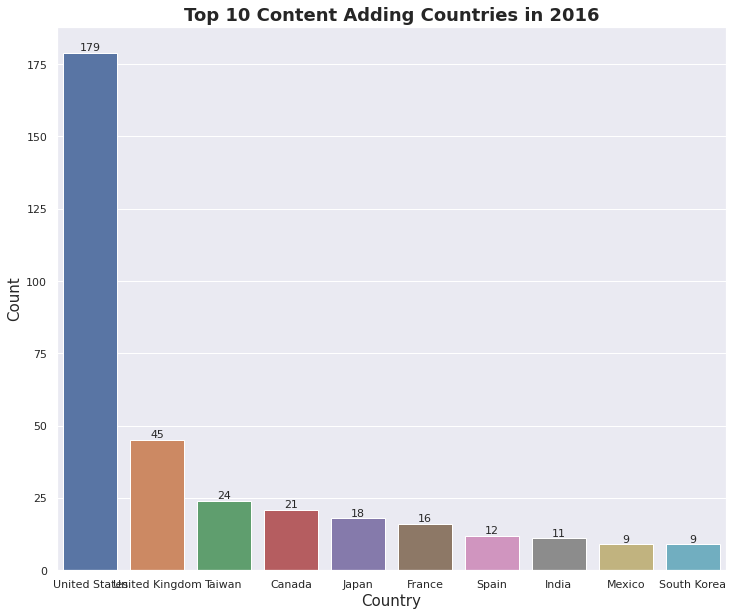

In [ ]:
total_2016 = countries[countries['year_added']==2016]['first_country'].value_counts()
barplt, ax = plt.subplots(figsize=(12,10))
sns.set_theme(style="darkgrid")
ax = sns.barplot(x=total_2016[:10].index, y=total_2016[:10])
ax.set_title('Top 10 Content Adding Countries in 2016',fontsize = 18, fontweight='bold' )
ax.set_xlabel('Country', fontsize = 15)
ax.set_ylabel('Count', fontsize = 15)
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.75,int(rect.get_height()),horizontalalignment='center', fontsize = 11)

In [ ]:
def plot_country_content_count_year(year, df, content):
    count = df[df['year_added']==year]['first_country'].value_counts()
    barplt, ax = plt.subplots(figsize=(12,10))
    sns.set_theme(style="darkgrid")
    ax = sns.barplot(x=count[:10].index, y=count[:10])
    ax.set_title(f'Top 10 {content} Adding Countries in {year}',fontsize = 18, fontweight='bold' )
    ax.set_xlabel('Country', fontsize = 15)
    ax.set_ylabel('Count', fontsize = 15)
    for rect in ax.patches:
        ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.75,int(rect.get_height()),horizontalalignment='center', fontsize = 11)

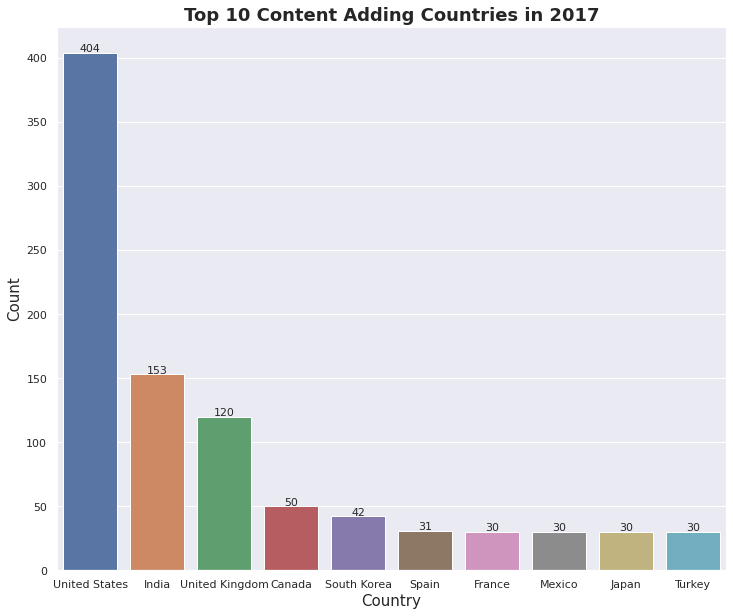

In [ ]:
plot_country_content_count_year(2017, countries, "Content")

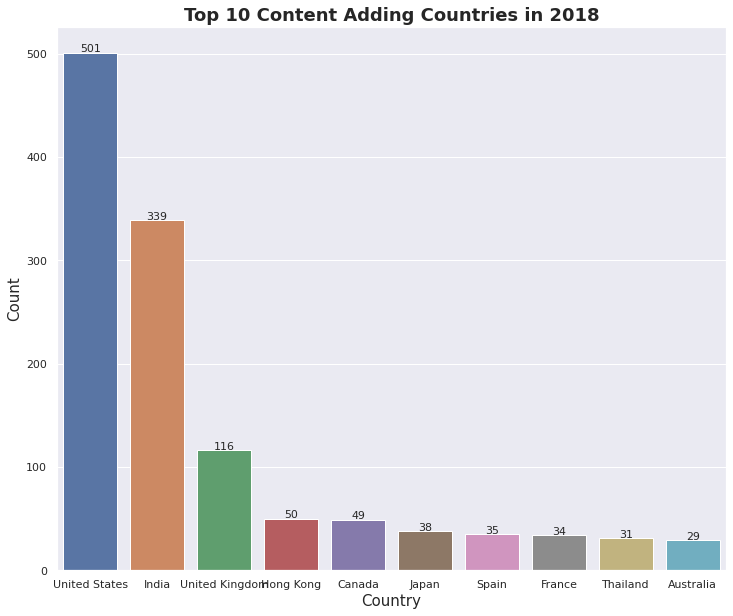

In [ ]:
plot_country_content_count_year(2018, countries, "Content")

## 국가별 영화/드라마 상대적 비율

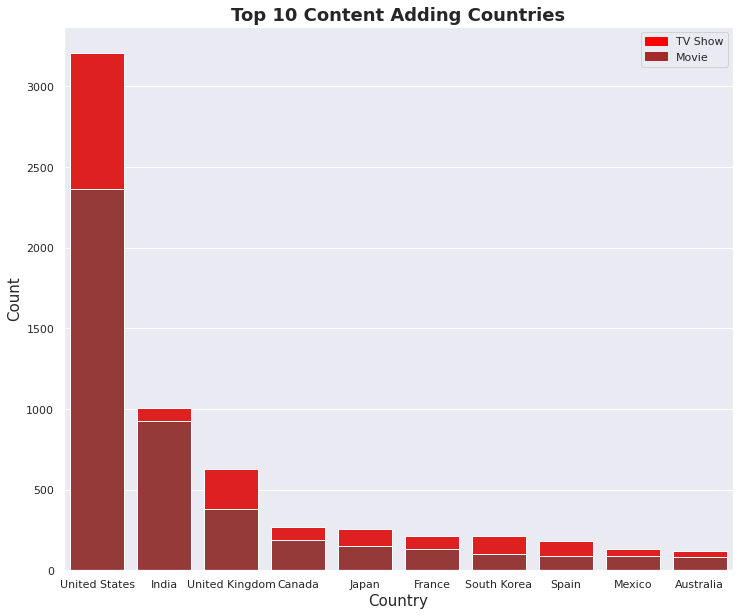

In [ ]:
import matplotlib.patches as mpatches

count = countries['first_country'].value_counts()
movie_count = movie_country['first_country'].value_counts()
barplt, ax = plt.subplots(figsize=(12,10))
sns.set_theme(style="darkgrid")
bar1 = sns.barplot(x=count[:10].index, y=count[:10], color='red')
bar2 = sns.barplot(x=count[:10].index, y=movie_count[:10], color='brown')
ax.set_title(f'Top 10 Content Adding Countries',fontsize = 18, fontweight='bold' )
ax.set_xlabel('Country', fontsize = 15)
ax.set_ylabel('Count', fontsize = 15)
top_bar = mpatches.Patch(color='red', label='TV Show')
bottom_bar = mpatches.Patch(color='brown', label='Movie')
plt.legend(handles=[top_bar, bottom_bar])
#for rect in ax.patches:
#    ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.75,int(rect.get_height()),horizontalalignment='center', fontsize = 11)

## 국가별 영화/드라마 절대적 비율

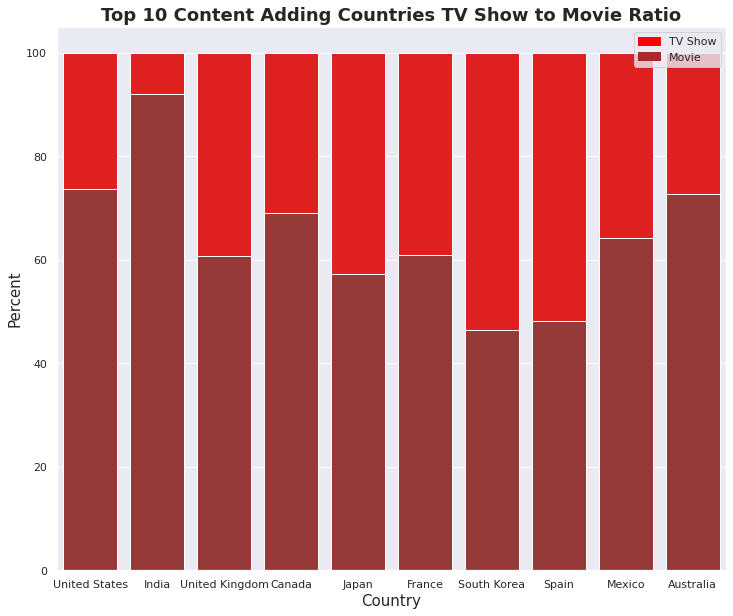

In [ ]:
total = countries['first_country'].value_counts()
movie_count = movie_country['first_country'].value_counts()
movie_percent = [i / j * 100 for i,j in zip(movie_count, total)]
total_percent = [i / j * 100 for i,j in zip(total, total)]

barplt, ax = plt.subplots(figsize=(12,10))
sns.set_theme(style="darkgrid")
bar1 = sns.barplot(x=total[:10].index, y=total_percent[:10], color='red')
bar2 = sns.barplot(x=total[:10].index, y=movie_percent[:10], color='brown')
ax.set_title(f'Top 10 Content Adding Countries TV Show to Movie Ratio',fontsize = 18, fontweight='bold' )
ax.set_xlabel('Country', fontsize = 15)
ax.set_ylabel('Percent', fontsize = 15)


# add legend
top_bar = mpatches.Patch(color='red', label='TV Show')
bottom_bar = mpatches.Patch(color='brown', label='Movie')
plt.legend(handles=[top_bar, bottom_bar])

## 연도별 국가의 드라마/영화 비율 추이

Text(0, 0.5, 'Ratio')

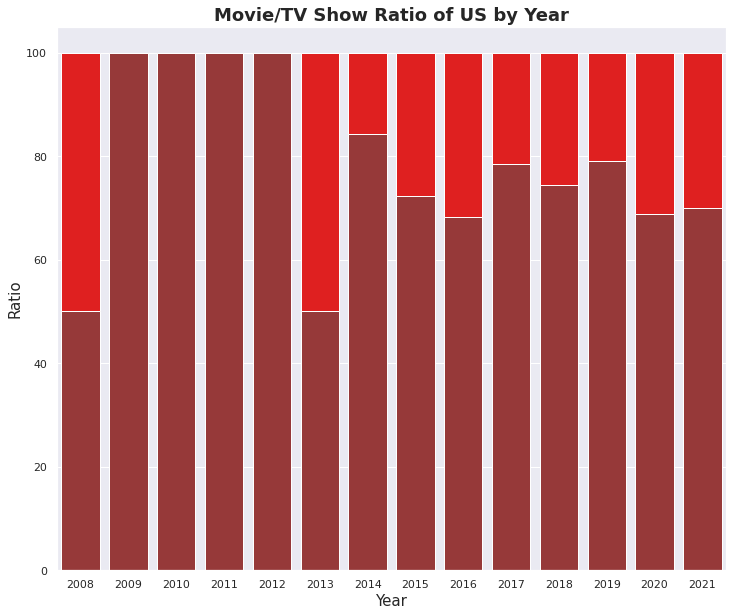

In [ ]:
total_US = countries[countries['first_country']=='United States']['year_added'].dropna().astype('uint64').value_counts()
movie_US = movie_country[movie_country['first_country']=='United States']['year_added'].astype('uint64').value_counts()

movie_percent = [i / j * 100 for i,j in zip(movie_US, total_US)]
total_percent = [i / j * 100 for i,j in zip(total_US, total_US)]

barplt, ax = plt.subplots(figsize=(12,10))
sns.set_theme(style="darkgrid")
bar1 = sns.barplot(x=total_US.index, y=total_percent, color='red')
bar2 = sns.barplot(x=total_US.index, y=movie_percent, color='brown')
ax.set_title('Movie/TV Show Ratio of US by Year',fontsize = 18, fontweight='bold' )
ax.set_xlabel('Year', fontsize = 15)
ax.set_ylabel('Percent', fontsize = 15)

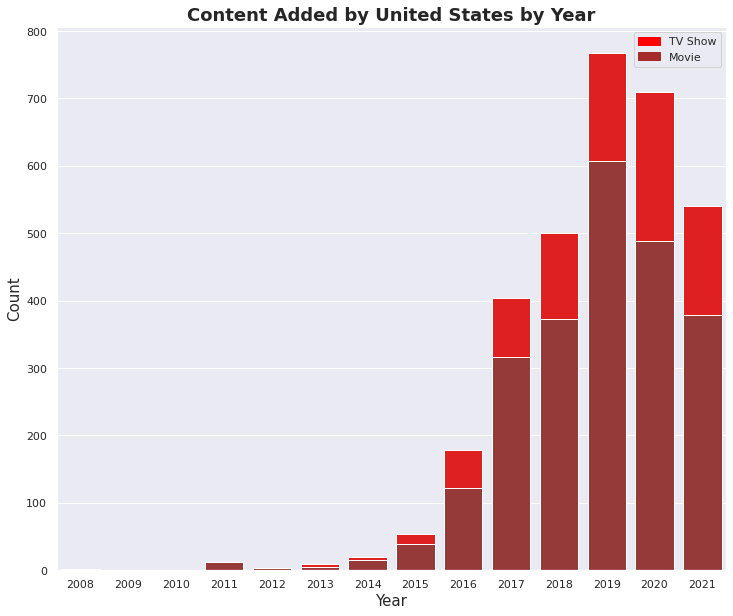

In [ ]:
total_US = countries[countries['first_country']=='United States']['year_added'].dropna().astype('uint64').value_counts()
movie_US = movie_country[movie_country['first_country']=='United States']['year_added'].astype('uint64').value_counts()
barplt, ax = plt.subplots(figsize=(12,10))
sns.set_theme(style="darkgrid")
bar1 = sns.barplot(x=total_US.index, y=total_US, color='red')
bar2 = sns.barplot(x=movie_US.index, y=movie_US, color='brown')
ax.set_title(f'Content Added by United States by Year',fontsize = 18, fontweight='bold' )
ax.set_xlabel('Year', fontsize = 15)
ax.set_ylabel('Count', fontsize = 15)
top_bar = mpatches.Patch(color='red', label='TV Show')
bottom_bar = mpatches.Patch(color='brown', label='Movie')
plt.legend(handles=[top_bar, bottom_bar])